# Prueba Fundamentos Data Science
## Desafio 2 : Determinantes de Ingreso
##### Nombre: Francisco Sepulveda Barrueto
##### Generacion : G47
##### Profesores:  Alfonso Tobar-Sebastian Ulloa
##### Fecha :

- **Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellosalumnos que presentan un bajo desempeño académico, medido en el promedio final del añoescolar. Para ello le envían un archivo con registros sociodemográficos y conductuales delos alumnos de dos escuelas para perfilar a los estudiantes.De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntasasociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas sepueden abstraer en categorías latentes**

In [149]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from feature_engine.encoding import OneHotEncoder,OrdinalEncoder
from feature_engine.imputation import CategoricalImputer,MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn import set_config
set_config(display="diagram")
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [281]:
df=pd.read_csv("students.csv")
df

,|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences|G1|G2|G3
0,0|GP|F|nulidade|U|GT3|A|4|4|at_home|teacher|co...
1,"1|GP|F|""""""17""""""|U|GT3|T|1|1|at_home|other|cour..."
2,"2|GP|F|""""""15""""""|U|LE3|T|1|1|at_home|other|othe..."
3,"3|GP|F|""""""15""""""|U|GT3|T|4|2|health|services|ho..."
4,4|GP|F|sem validade|U|GT3|T|3|3|other|other|ho...
...,...
390,"390|MS|M|""""""20""""""|U|LE3|A|2|2|services|service..."
391,"391|MS|M|""""""17""""""|U|LE3|T|3|1|services|service..."
392,"392|MS|M|""""""21""""""|R|GT3|T|1|1|other|other|cour..."
393,"393|MS|M|""""""18""""""|R|LE3|T|3|2|services|other|c..."


In [282]:
df.columns=["columna"]

In [283]:
df=df.columna.str.split(pat='|',expand=True)
df


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""""""4""""""",1,1,"""""""3""""""",6,5,6,6
1,1,GP,F,"""""""17""""""",U,GT3,T,1,1,at_home,...,5,3,"""""""3""""""",1,1,"""""""3""""""",4,5,5,6
2,2,GP,F,"""""""15""""""",U,LE3,T,1,1,at_home,...,4,3,"""""""2""""""",2,3,"""""""3""""""",10,zero,8,10
3,3,GP,F,"""""""15""""""",U,GT3,T,4,2,health,...,3,2,"""""""2""""""",1,1,"""""""5""""""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""""""2""""""",1,2,"""""""5""""""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,"""""""20""""""",U,LE3,A,2,2,services,...,5,5,"""""""4""""""",4,5,"""""""4""""""",11,9,9,9
391,391,MS,M,"""""""17""""""",U,LE3,T,3,1,services,...,2,4,"""""""5""""""",3,4,"""""""2""""""",3,14,16,16
392,392,MS,M,"""""""21""""""",R,GT3,T,1,1,other,...,5,5,"""""""3""""""",3,3,"""""""3""""""",3,10,8,7
393,393,MS,M,"""""""18""""""",R,LE3,T,3,2,services,...,4,4,"""""""1""""""",3,4,"""""""5""""""",0,11,12,10


In [284]:
df=df.drop([0],axis=1)
df


,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""""""4""""""",1,1,"""""""3""""""",6,5,6,6
1,GP,F,"""""""17""""""",U,GT3,T,1,1,at_home,other,...,5,3,"""""""3""""""",1,1,"""""""3""""""",4,5,5,6
2,GP,F,"""""""15""""""",U,LE3,T,1,1,at_home,other,...,4,3,"""""""2""""""",2,3,"""""""3""""""",10,zero,8,10
3,GP,F,"""""""15""""""",U,GT3,T,4,2,health,services,...,3,2,"""""""2""""""",1,1,"""""""5""""""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""""""2""""""",1,2,"""""""5""""""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""""""20""""""",U,LE3,A,2,2,services,services,...,5,5,"""""""4""""""",4,5,"""""""4""""""",11,9,9,9
391,MS,M,"""""""17""""""",U,LE3,T,3,1,services,services,...,2,4,"""""""5""""""",3,4,"""""""2""""""",3,14,16,16
392,MS,M,"""""""21""""""",R,GT3,T,1,1,other,other,...,5,5,"""""""3""""""",3,3,"""""""3""""""",3,10,8,7
393,MS,M,"""""""18""""""",R,LE3,T,3,2,services,other,...,4,4,"""""""1""""""",3,4,"""""""5""""""",0,11,12,10


In [285]:
df.columns=['school','sex','age','address','famsize','Pstatus','Medu',
'Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures',
'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""""""4""""""",1,1,"""""""3""""""",6,5,6,6
1,GP,F,"""""""17""""""",U,GT3,T,1,1,at_home,other,...,5,3,"""""""3""""""",1,1,"""""""3""""""",4,5,5,6
2,GP,F,"""""""15""""""",U,LE3,T,1,1,at_home,other,...,4,3,"""""""2""""""",2,3,"""""""3""""""",10,zero,8,10
3,GP,F,"""""""15""""""",U,GT3,T,4,2,health,services,...,3,2,"""""""2""""""",1,1,"""""""5""""""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""""""2""""""",1,2,"""""""5""""""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""""""20""""""",U,LE3,A,2,2,services,services,...,5,5,"""""""4""""""",4,5,"""""""4""""""",11,9,9,9
391,MS,M,"""""""17""""""",U,LE3,T,3,1,services,services,...,2,4,"""""""5""""""",3,4,"""""""2""""""",3,14,16,16
392,MS,M,"""""""21""""""",R,GT3,T,1,1,other,other,...,5,5,"""""""3""""""",3,3,"""""""3""""""",3,10,8,7
393,MS,M,"""""""18""""""",R,LE3,T,3,2,services,other,...,4,4,"""""""1""""""",3,4,"""""""5""""""",0,11,12,10


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Todos los Valores son objetos incluido los que son numeros estos estan como Object.
- Ademas que Segun lo que dice info no hay valores nulos , pero estos estan como  : "zero","nullidade","semvalidade"
- Se realizara un conteo de todas las columnas  para ver si todas presentan los mismos problemas 


In [287]:
columnas=['school','sex','age','address','famsize','Pstatus','Medu',
'Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures',
'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
for n in columnas:
    print(n)
    print(f'{df[n].value_counts()}')
    print ('-------------------------------------------------------')
    print("---------------------------------------------------------")
    

school
GP              345
MS               45
sem validade      2
zero              2
nulidade          1
Name: school, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
sex
F               206
M               186
nulidade          1
zero              1
sem validade      1
Name: sex, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
age
"""16"""        101
"""17"""         98
"""15"""         82
"""18"""         81
"""19"""         24
nulidade          3
"""20"""          3
sem validade      1
"""22"""          1
"""21"""          1
Name: age, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
address
U               305
R                88
sem validade      2
Name: address, dtype: int64
-------------------------------------------------------
----------------

In [288]:
df=df.replace(to_replace = ['sem validade','zero','nulidade'], value = np.nan)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""""""4""""""",1,1,"""""""3""""""",6,5,6,6
1,GP,F,"""""""17""""""",U,GT3,T,1,1,at_home,other,...,5,3,"""""""3""""""",1,1,"""""""3""""""",4,5,5,6
2,GP,F,"""""""15""""""",U,LE3,T,1,1,at_home,other,...,4,3,"""""""2""""""",2,3,"""""""3""""""",10,NaN,8,10
3,GP,F,"""""""15""""""",U,GT3,T,4,2,health,services,...,3,2,"""""""2""""""",1,1,"""""""5""""""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""""""2""""""",1,2,"""""""5""""""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""""""20""""""",U,LE3,A,2,2,services,services,...,5,5,"""""""4""""""",4,5,"""""""4""""""",11,9,9,9
391,MS,M,"""""""17""""""",U,LE3,T,3,1,services,services,...,2,4,"""""""5""""""",3,4,"""""""2""""""",3,14,16,16
392,MS,M,"""""""21""""""",R,GT3,T,1,1,other,other,...,5,5,"""""""3""""""",3,3,"""""""3""""""",3,10,8,7
393,MS,M,"""""""18""""""",R,LE3,T,3,2,services,other,...,4,4,"""""""1""""""",3,4,"""""""5""""""",0,11,12,10


In [192]:
columnas=['school','sex','age','address','famsize','Pstatus','Medu',
'Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures',
'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
for n in columnas:
    print(n)
    print(f'{df[n].value_counts()}')
    print ('-------------------------------------------------------')
    print("---------------------------------------------------------")

school
GP    345
MS     45
Name: school, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
sex
F    206
M    186
Name: sex, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
age
"""16"""    101
"""17"""     98
"""15"""     82
"""18"""     81
"""19"""     24
"""20"""      3
"""22"""      1
"""21"""      1
Name: age, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
address
U    305
R     88
Name: address, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
famsize
GT3    278
LE3    113
Name: famsize, dtype: int64
-------------------------------------------------------
---------------------------------------------------------
Pstatus
T    349
A     40
Name: Pstatus, dtype: int64
--------

In [289]:
# age
df['age'] = df['age'].map({'"""16"""':16,'"""17"""':17,'"""15"""':15,'"""18"""':18,
'"""19"""':19,'"""20"""':20,'"""22"""':22,'"""21"""':21}, na_action=None)

In [290]:
df.age.value_counts()

16.0    101
17.0     98
15.0     82
18.0     81
19.0     24
20.0      3
22.0      1
21.0      1
Name: age, dtype: int64

In [294]:
df['age'] = df['age'].astype('Int64')

In [295]:
df.age.value_counts()

16    101
17     98
15     82
18     81
19     24
20      3
22      1
21      1
Name: age, dtype: Int64

In [296]:
# goout
df['goout'] = df['goout'].map({'"""3"""':3,'"""2"""':2,'"""4"""':4,'"""5"""':5,'"""1"""':1}, na_action=None)


In [198]:
df.goout.value_counts()

3.0    128
2.0    103
4.0     83
5.0     53
1.0     23
Name: goout, dtype: int64

In [297]:
df['goout'] = df['goout'].astype('Int64')

In [298]:
# health
df['health'] = df['health'].map({'"""3"""':3,'"""2"""':2,'"""4"""':4,'"""5"""':5,'"""1"""':1}, na_action=None)

In [299]:
df.health.value_counts()

5.0    145
3.0     91
4.0     66
2.0     45
1.0     44
Name: health, dtype: int64

In [300]:
df['health'] = df['health'].astype('Int64')

In [301]:
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

In [304]:
ci=CategoricalImputer(imputation_method='frequent') # Nulos de tipo Categoricos 
mmi=MeanMedianImputer(imputation_method='median') # Nulos de tipo numerico 
df1=ci.fit_transform(df)
df2=mmi.fit_transform(df1)
df=df2
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    Int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [338]:
# se deben pasar a otro tidpo de dato las siguiente lista

lista=['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','Dalc','Walc','health','absences','G1','G2','G3']
for n in lista:
    df[n] = df[n].astype('float')
    df[n] = df[n].astype('Int64')


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    Int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    Int64 
 7   Fedu        395 non-null    Int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    Int64 
 13  studytime   395 non-null    Int64 
 14  failures    395 non-null    Int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [340]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.701266,2.751899,2.518987,1.448101,2.037975,0.331646,3.949367,3.227848,3.101266,1.478481,2.278481,3.574684,5.673418,10.924051,10.713924,10.443038
std,1.273260,1.096471,1.083573,0.697505,0.837616,0.743080,0.891282,0.994265,1.110574,0.890684,1.293646,1.370971,8.004896,3.305019,3.761505,4.550748
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- El data frame ya esta limpio sin NaN , con los datos en el tipo correspondiente 

- DEbemos visualizar las correlaciones entre las variables y sobre todo la correlacion entre las notas y las demas variables

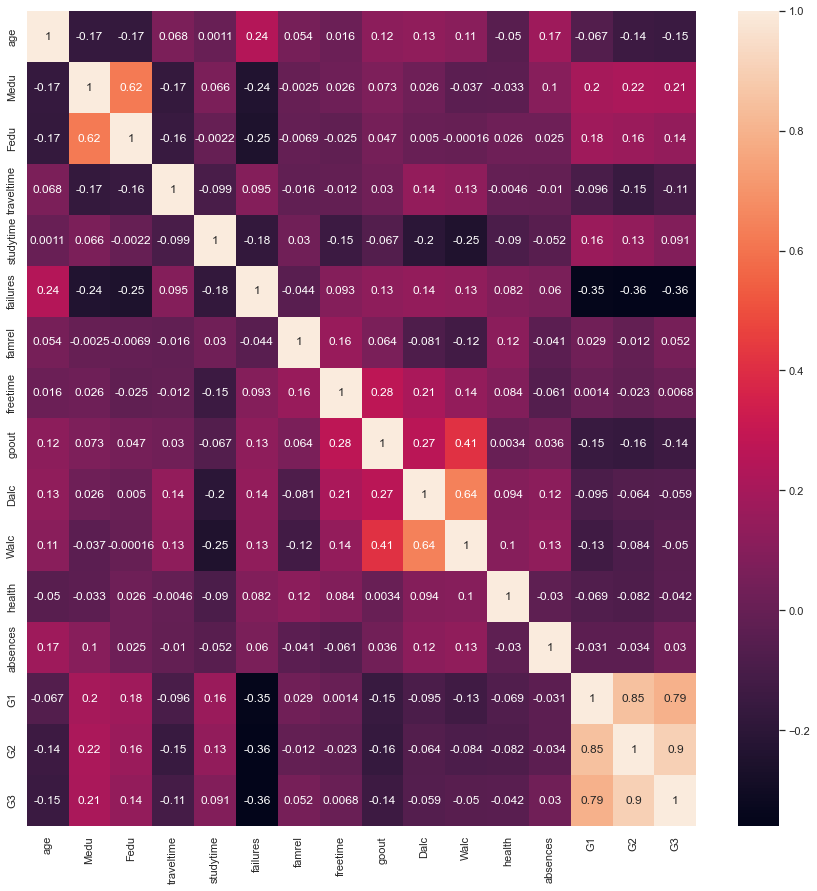

In [309]:
correlacion=df.corr(method='pearson')
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(correlacion,cbar=True,annot=True);


Visualizando en 2D para ver el compratmiento de la variable , analisis exploratorio

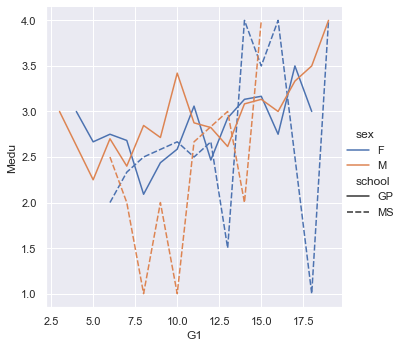

In [488]:
sns.relplot(x="G1", y="Medu", hue="sex", style="school",
            kind="line",ci=None, data=df);

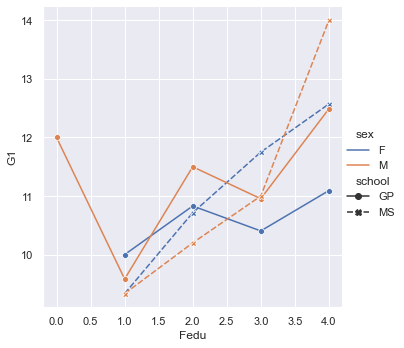

In [496]:
sns.relplot(y="G1", x="Fedu", hue="sex", style="school",
            kind="line",ci=None,markers=True, data=df);

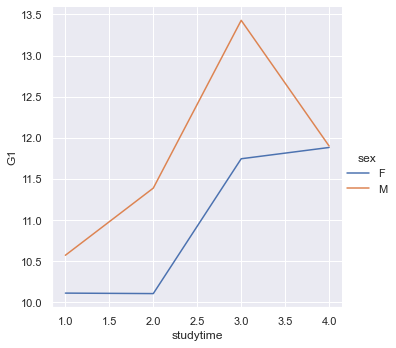

In [495]:
sns.relplot(y="G1", x="studytime", hue="sex",
            kind="line",ci=None,markers=True, data=df);

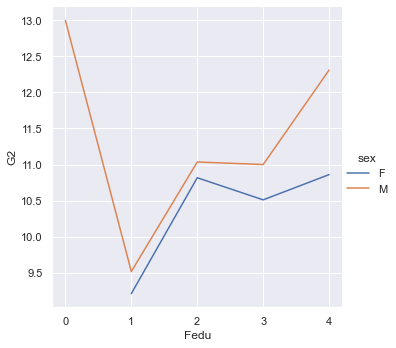

In [494]:
sns.relplot(x="Fedu", y="G2", hue="sex",
            kind="line",ci=None,markers=True, data=df);

-  Tal como podemos observar Existen una variable que destaca por sobre las demas que es Medu el cual corresponde al nIvel educacional de la Madre y Fedu que tambien tenderia a explicar de mejor forma
la variabilidad de G1 G2 G3 que las demas , Studytime tambien tiene puede explicar esto. Mientras que las demas variables no se ve una correlacion.

- Tal como se puede visualizar se espera que el comportamiento no sea tan lineal si no que un comportamiento mas cubico 

# VISUALIZANDO LAS VARIABLES DE LA SICOPEDAGOGA

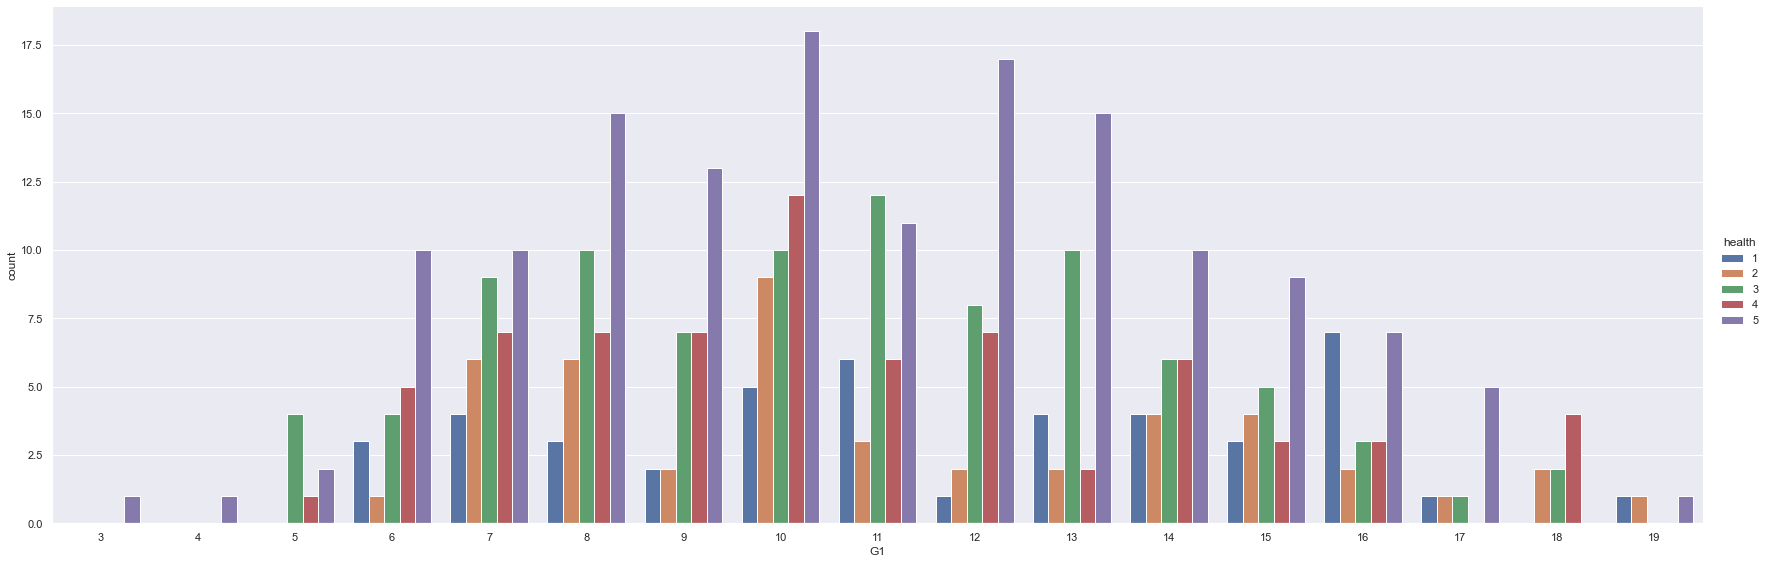

In [382]:

sns.catplot(x="G1",data=df,kind="count",hue="health",height=8,aspect=3);


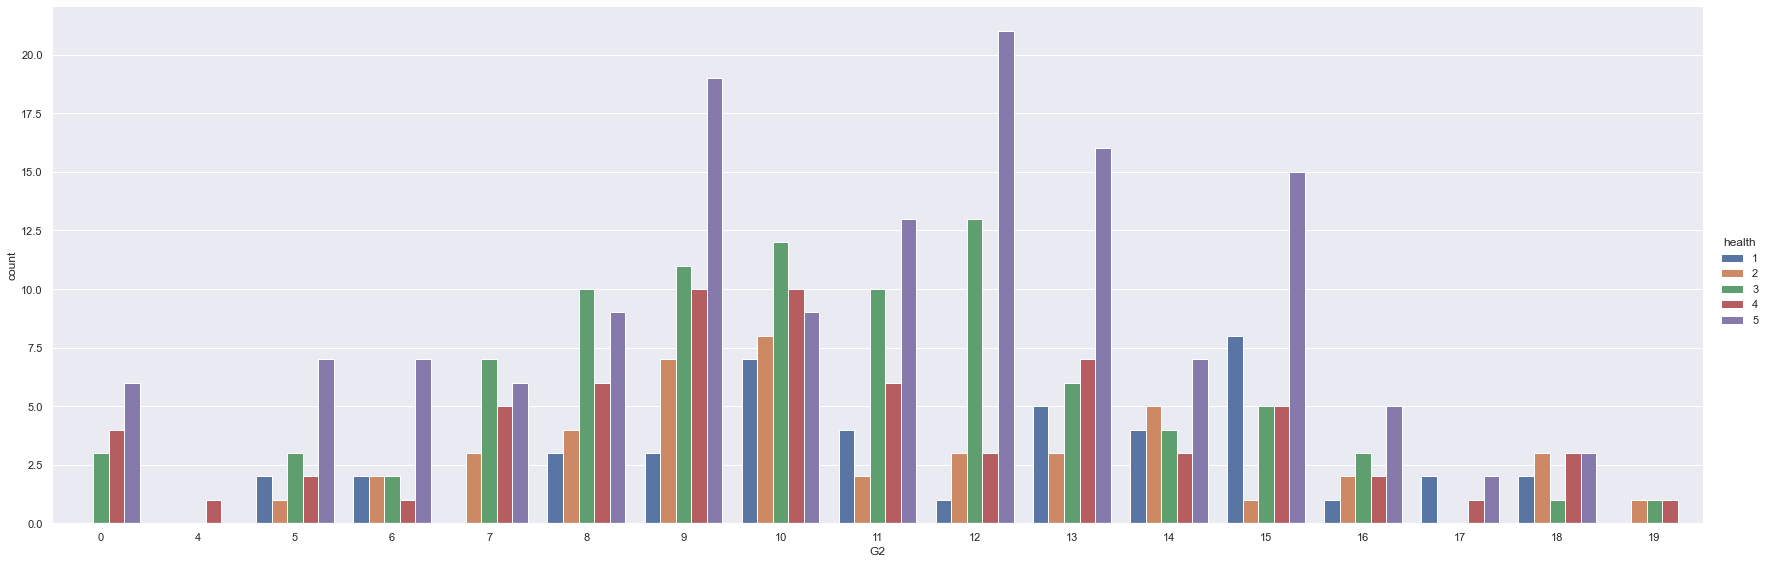

In [383]:

sns.catplot(x="G2",data=df,kind="count",hue="health",height=8,aspect=3);


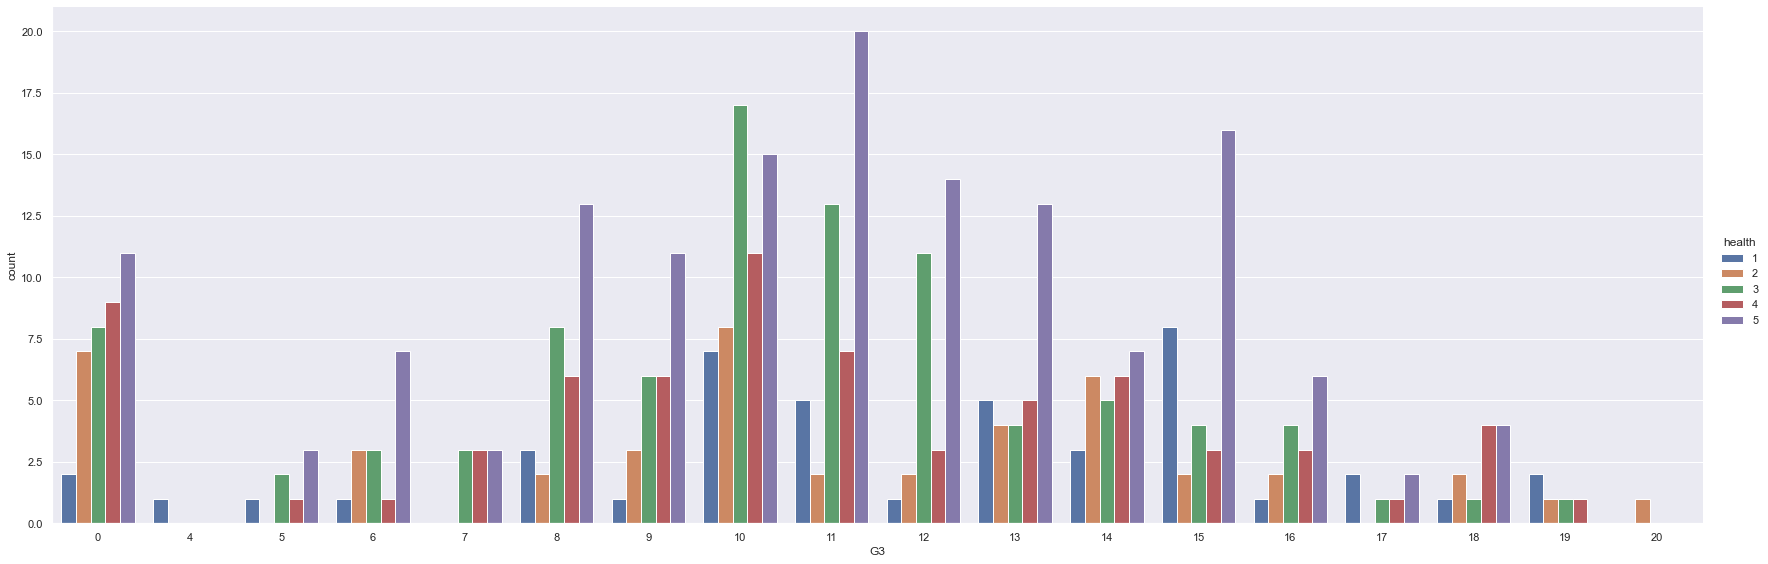

In [384]:
sns.catplot(x="G3",data=df,kind="count",hue="health",height=8,aspect=3);


In [374]:
df.groupby(["health"]).G1.mean()

health
1        11.75
2    11.266667
3    10.637363
4    10.685714
5    10.862069
Name: G1, dtype: Float64

In [377]:
df.groupby(["health"]).G2.mean()

health
1    11.954545
2    11.111111
3    10.274725
4    10.357143
5    10.662069
Name: G2, dtype: Float64

In [378]:
df.groupby(["health"]).G3.mean()

health
1    11.772727
2    10.222222
3    10.021978
4         10.1
5    10.537931
Name: G3, dtype: Float64

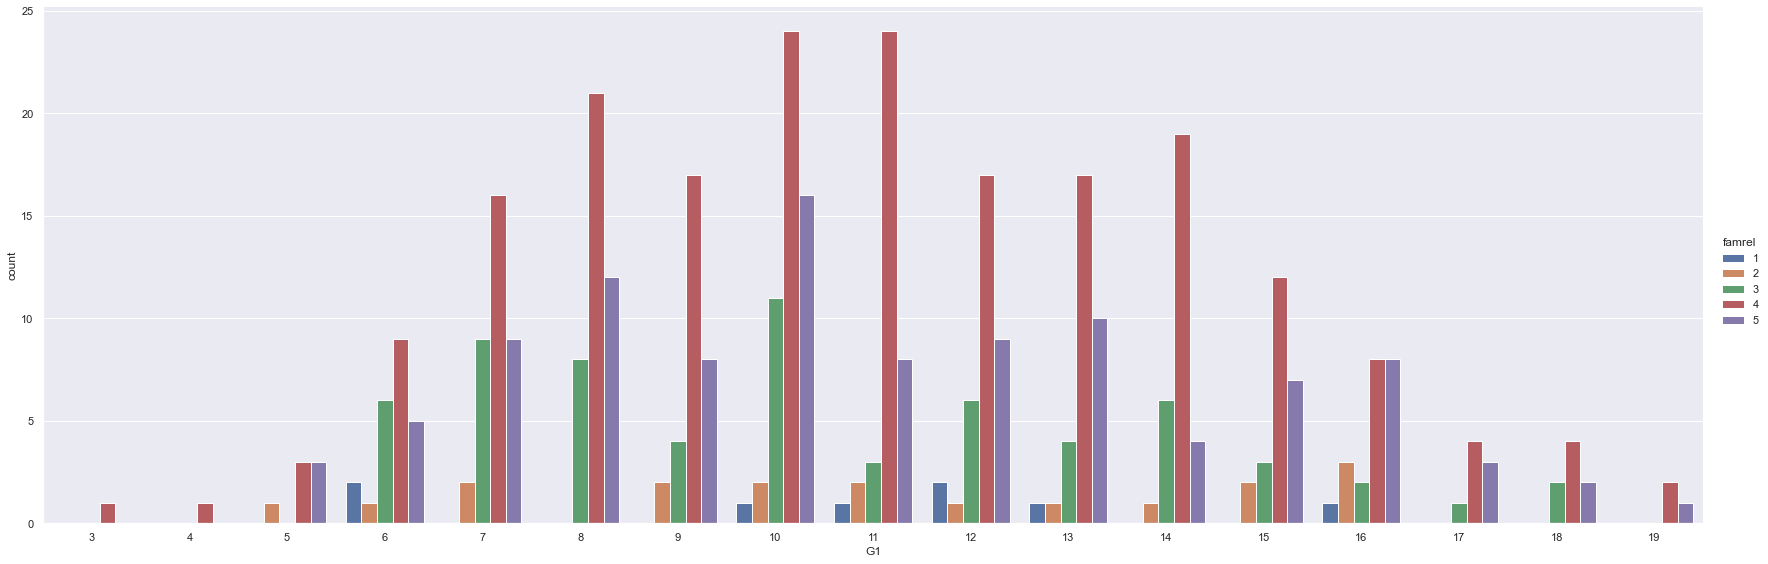

In [385]:
sns.catplot(x="G1",data=df,kind="count",hue="famrel",height=8,aspect=3);

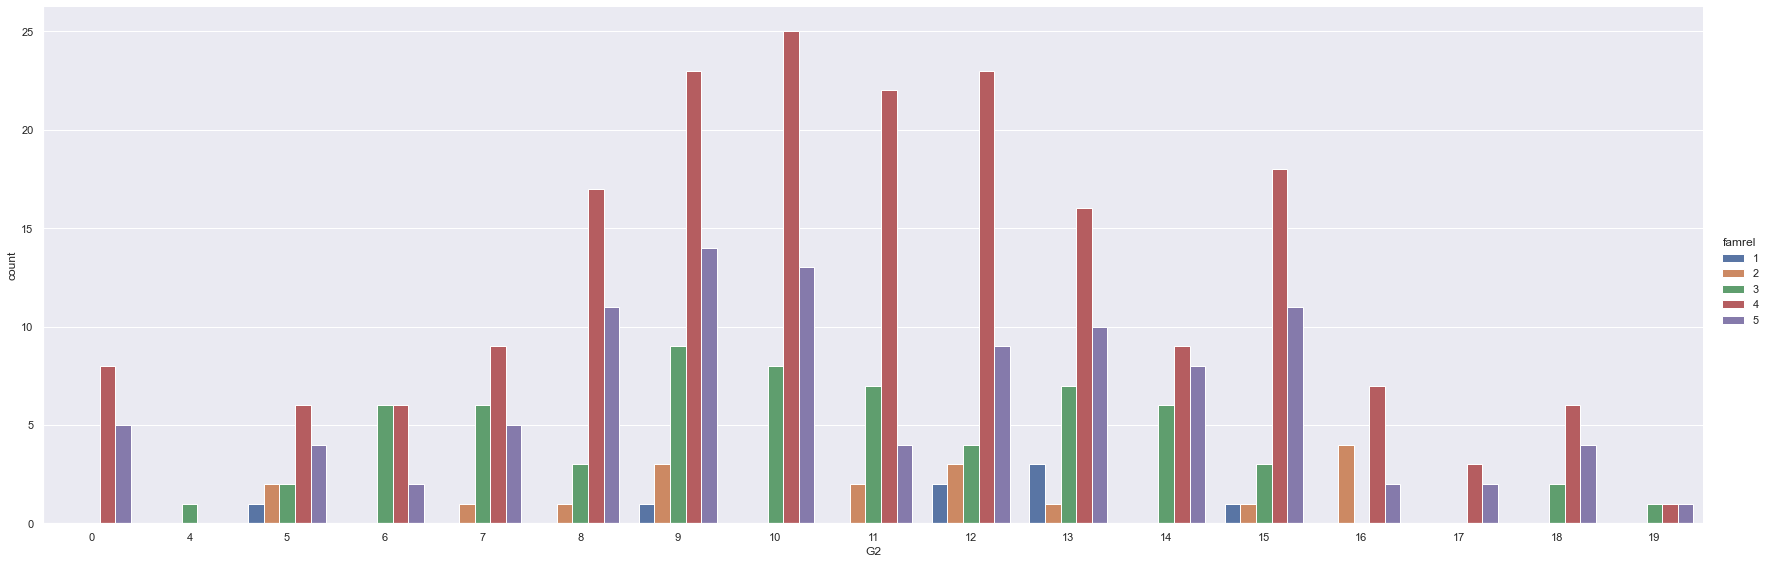

In [386]:
sns.catplot(x="G2",data=df,kind="count",hue="famrel",height=8,aspect=3);

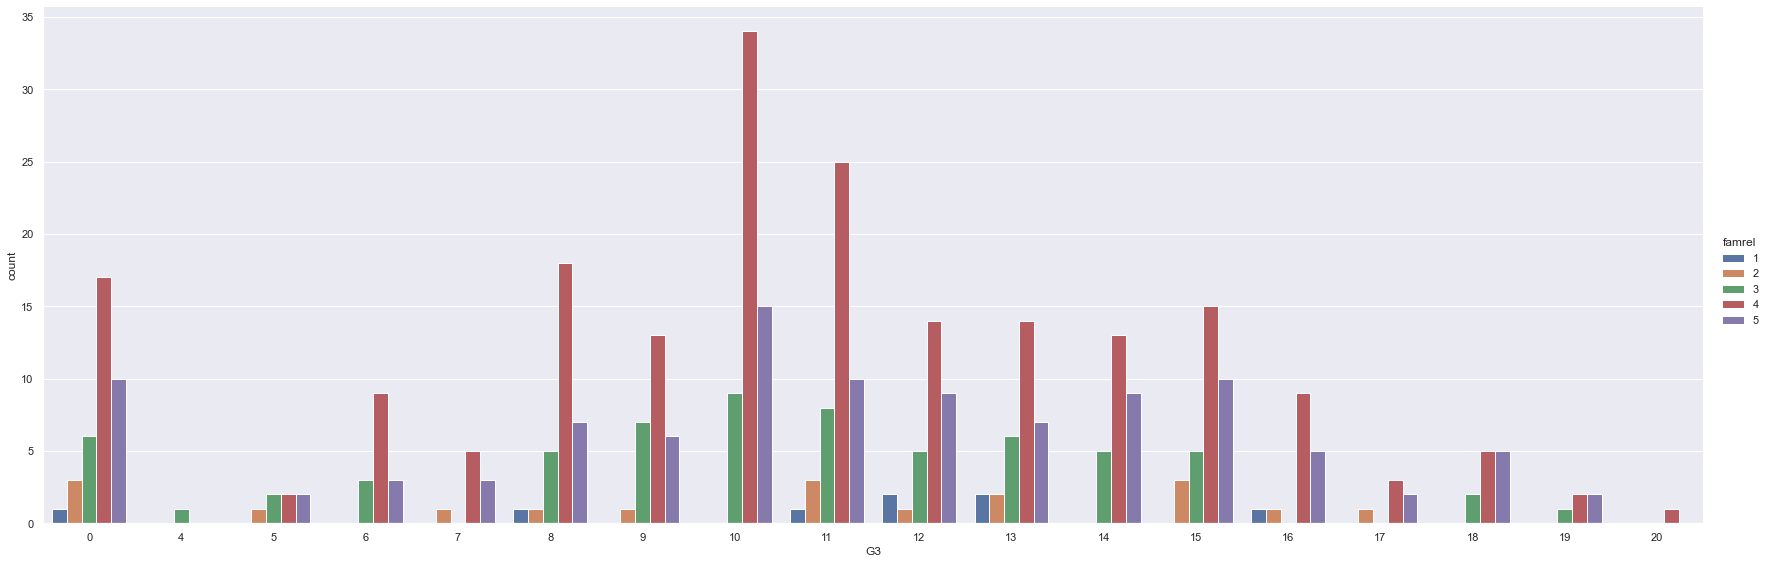

In [387]:
sns.catplot(x="G3",data=df,kind="count",hue="famrel",height=8,aspect=3);

In [388]:
df.groupby(["famrel"]).G1.mean()

famrel
1        10.75
2    11.222222
3    10.461538
4    11.005025
5    11.019048
Name: G1, dtype: Float64

In [389]:
df.groupby(["famrel"]).G2.mean()

famrel
1         11.5
2    11.222222
3    10.415385
4    10.723618
5    10.733333
Name: G2, dtype: Float64

In [390]:
df.groupby(["famrel"]).G3.mean()

famrel
1       10.625
2     9.888889
3    10.015385
4    10.427136
5    10.819048
Name: G3, dtype: Float64

- Segun lo analizado las notas G1,G2 ,G3 tienden a no variar con estas variables 
- Se analizara si pueden ser reducidas con el test de Sfericidad y KMO

In [401]:
var_sico=df[['famrel', 'freetime', 'goout', 'Dalc','Walc', 'health']]
var_sico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   famrel    395 non-null    Int64
 1   freetime  395 non-null    Int64
 2   goout     395 non-null    Int64
 3   Dalc      395 non-null    Int64
 4   Walc      395 non-null    Int64
 5   health    395 non-null    Int64
dtypes: Int64(6)
memory usage: 21.0 KB


In [394]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])
X_ohe=ohe.fit_transform(X)

In [418]:
_,pvalue=calculate_bartlett_sphericity(X_ohe.astype('float'))
pvalue

4.660055407642499e-168

- Se pasa el TEST , se puede seguir con el calculo de KMO

In [417]:
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_ohe.astype('float'))
pd.Series(kmo_all,index=X_ohe.columns)





school        0.606376
sex           0.680113
age           0.606814
address       0.576703
famsize       0.551502
Pstatus       0.516113
Medu          0.651535
Fedu          0.616626
Mjob          0.671258
Fjob          0.456892
reason        0.698347
guardian      0.443546
traveltime    0.629333
studytime     0.695061
failures      0.715307
schoolsup     0.541795
famsup        0.657129
paid          0.655353
activities    0.535783
nursery       0.653531
higher        0.710095
internet      0.652648
romantic      0.549500
famrel        0.453845
freetime      0.633907
goout         0.569246
Dalc          0.670963
Walc          0.622356
health        0.535868
absences      0.495631
dtype: float64

In [410]:
kmo_model

0.6223624989118337

# Segun la lectura el valor kmo tiene que ser mayor a 0.7 en este caso las variables a reducir estan bajo ese valor por lo tanto no se reducen.

# Modelo descriptivo G1

In [344]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()


c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4.202
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.96e-11
Time:                        17:27:13   Log-Likelihood:                -973.45
No. Observations:                 395   AIC:                             2009.
Df Residuals:                     364   BIC:                             2132.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2673      0.858     10.807      0.000       7.581      10.954
school         0.0383      0.563      0.068      0.946      -1.068       1.145
sex            0.7763      0.358      2.171      0.031       0.073       1.479
age           -0.0144      0.190     -0.076      0.940      -0.388       0.360
address       -0.2432      0.413     -0.589      0.556      -1.054       0.568
famsize        0.5812      0.349      1.666      0.097      -0.105       1.267
Pstatus        0.0960      0.520      0.185      0.854      -0.927       1.119
Medu           0.2892      0.222      1.302      0.194      -0.148       0.726
Fedu           0.3026      0.201      1.504      0.133      -0.093       0.698
Mjob          -0.1577      0.145     -1.087      0.278      -0.443       0.128
Fjob           0.0272      0.178      0.153      0.879      -0.323       0.377
reason         0.1477      0.130      1.132      0.259      -0.109       0.404
guardian       0.1526      0.267      0.571      0.569      -0.373       0.678
traveltime    -0.0418      0.169     -0.247      0.805      -0.375       0.291
studytime      0.4697      0.171      2.753      0.006       0.134       0.805
failures      -0.8245      0.174     -4.742      0.000      -1.166      -0.483
schoolsup      1.8679      0.482      3.873      0.000       0.919       2.816
famsup        -0.7376      0.342     -2.159      0.031      -1.409      -0.066
paid          -0.1510      0.337     -0.449      0.654      -0.813       0.511
activities    -0.1148      0.318     -0.361      0.719      -0.741       0.511
nursery       -0.1096      0.393     -0.279      0.781      -0.882       0.663
higher        -1.1764      0.761     -1.545      0.123      -2.674       0.321
internet       0.2795      0.444      0.629      0.530      -0.594       1.153
romantic      -0.2351      0.337     -0.698      0.486      -0.898       0.427
famrel         0.0031      0.157      0.020      0.984      -0.306       0.313
freetime       0.2358      0.167      1.411      0.159      -0.093       0.564
goout         -0.4272      0.178     -2.401      0.017      -0.777      -0.077
Dalc          -0.0250      0.206     -0.121      0.904      -0.431       0.381
Walc          -0.1702      0.221     -0.770      0.442      -0.604       0.264
health        -0.1091      0.159     -0.689      0.492      -0.421       0.203
absences       0.0439      0.164      0.267      0.789      -0.279       0.367
==============================================================================
Omnibus:                        5.375   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.399
Skew:                           0.164   Prob(JB):                        0.111
Kurtosis:                       2.600   Cond. No.                         24.3
==

-  Segun el modelo el condicion N° indica que no existe colinealidad o es baja, ademas el AIC BIC tiene un bajo orden de magnitud que sera comparado con los demas modelos.
- El R2 es bajo habiendo poca correlacion entre la varianza del vector objetivo y las variables
- Ademas existe una serie de variables no significativas las cuales seran analizadas.
 

In [448]:
p_values_model1=model.pvalues
p_values_model1=p_values_model1.sort_values(ascending=False)
p_values_model1

famrel        9.840528e-01
school        9.458158e-01
age           9.395952e-01
Dalc          9.037468e-01
Fjob          8.786988e-01
Pstatus       8.537064e-01
traveltime    8.049790e-01
absences      7.893079e-01
nursery       7.805178e-01
activities    7.185401e-01
paid          6.540189e-01
guardian      5.685185e-01
address       5.559215e-01
internet      5.295708e-01
health        4.915134e-01
romantic      4.856840e-01
Walc          4.415159e-01
Mjob          2.777348e-01
reason        2.585753e-01
Medu          1.936650e-01
freetime      1.591655e-01
Fedu          1.333933e-01
higher        1.232238e-01
famsize       9.661824e-02
famsup        3.146655e-02
sex           3.055188e-02
goout         1.684647e-02
studytime     6.197793e-03
schoolsup     1.275894e-04
failures      3.037503e-06
const         8.504435e-24
dtype: float64

In [452]:
lista_no_significativas=[]
for p in range(p_values_model1.shape[0]):
    if p_values_model1[p]>0.05:
        lista_no_significativas.append(p_values_model1.index[p])

lista_no_significativas

['famrel',
 'school',
 'age',
 'Dalc',
 'Fjob',
 'Pstatus',
 'traveltime',
 'absences',
 'nursery',
 'activities',
 'paid',
 'guardian',
 'address',
 'internet',
 'health',
 'romantic',
 'Walc',
 'Mjob',
 'reason',
 'Medu',
 'freetime',
 'Fedu',
 'higher',
 'famsize']

- Se ordeno de cuales eran menos significativas a mas siginificativas y se agrego a una lista las variables no siginificativas.
- Se retiraran variables para el modelo.


In [454]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3","famrel"])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['age','Medu','Fedu','traveltime','studytime','failures','freetime','goout','Dalc','Walc','health','absences'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.359
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           9.19e-12
Time:                        14:14:13   Log-Likelihood:                -973.45
No. Observations:                 395   AIC:                             2007.
Df Residuals:                     365   BIC:                             2126.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2673      0.856     10.822      0.000       7.583      10.951
school         0.0373      0.560      0.067      0.947      -1.063       1.138
sex            0.7767      0.356      2.179      0.030       0.076       1.478
age           -0.0140      0.189     -0.074      0.941      -0.385       0.357
address       -0.2429      0.412     -0.590      0.556      -1.052       0.567
famsize        0.5810      0.348      1.668      0.096      -0.104       1.266
Pstatus        0.0958      0.519      0.184      0.854      -0.926       1.117
Medu           0.2891      0.222      1.304      0.193      -0.147       0.725
Fedu           0.3026      0.201      1.506      0.133      -0.092       0.698
Mjob          -0.1576      0.145     -1.088      0.277      -0.442       0.127
Fjob           0.0273      0.178      0.153      0.878      -0.322       0.377
reason         0.1476      0.130      1.133      0.258      -0.109       0.404
guardian       0.1528      0.267      0.572      0.568      -0.372       0.678
traveltime    -0.0417      0.169     -0.247      0.805      -0.374       0.290
studytime      0.4697      0.170      2.757      0.006       0.135       0.805
failures      -0.8248      0.173     -4.761      0.000      -1.165      -0.484
schoolsup      1.8677      0.482      3.879      0.000       0.921       2.815
famsup        -0.7379      0.341     -2.165      0.031      -1.408      -0.068
paid          -0.1507      0.336     -0.449      0.654      -0.811       0.510
activities    -0.1148      0.318     -0.361      0.718      -0.740       0.510
nursery       -0.1094      0.392     -0.279      0.780      -0.881       0.662
higher        -1.1768      0.760     -1.548      0.122      -2.672       0.318
internet       0.2798      0.443      0.631      0.528      -0.592       1.151
romantic      -0.2355      0.336     -0.702      0.483      -0.896       0.425
freetime       0.2362      0.165      1.429      0.154      -0.089       0.561
goout         -0.4269      0.177     -2.414      0.016      -0.775      -0.079
Dalc          -0.0251      0.206     -0.122      0.903      -0.430       0.380
Walc          -0.1708      0.218     -0.782      0.435      -0.600       0.259
health        -0.1087      0.157     -0.693      0.489      -0.417       0.200
absences       0.0438      0.164      0.267      0.789      -0.278       0.366
==============================================================================
Omnibus:                        5.367   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.395
Skew:                           0.164   Prob(JB):                        0.111
Kurtosis:                       2.601   Cond. No.                         24.3
==============================================================================

N

- Por falta de tiempo se evitara remover variable por variable , lo cual seria lo mas correcto a realizar.
- Se retiraran todas las variables no significativas dentro del modelo.

In [470]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",'famrel','school','age', 'Dalc','Fjob', 'Pstatus','traveltime',
 'absences',
 'nursery',
 'activities',
 'paid',
 'guardian',
 'address',
 'internet',
 'health',
 'romantic',
 'Walc',
 'Mjob',
 'reason',
 'Medu',
 'freetime',
 'Fedu',
 'higher',
 'famsize'])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['studytime','failures','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     16.78
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.10e-17
Time:                        15:58:32   Log-Likelihood:                -986.62
No. Observations:                 395   AIC:                             1987.
Df Residuals:                     388   BIC:                             2015.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2982      0.500     18.592      0.000       8.315      10.281
sex            0.7667      0.319      2.400      0.017       0.139       1.395
studytime      0.5056      0.160      3.163      0.002       0.191       0.820
failures      -1.0438      0.153     -6.831      0.000      -1.344      -0.743
schoolsup      1.8100      0.457      3.963      0.000       0.912       2.708
famsup        -0.5117      0.315     -1.623      0.105      -1.132       0.108
goout         -0.3874      0.151     -2.568      0.011      -0.684      -0.091
==============================================================================
Omnibus:                        9.895   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.448
Skew:                           0.229   Prob(JB):                       0.0241
Kurtosis:                       2.507   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Para el primer modelo se tiene AIC:	2009	BIC:	2132.
- Para este AIC:	1987. BIC:	2015.
- Ademas de tener un Cond Number menor .
- Apesar de lo anterior se tine un r2 menor que del primer modelo

- Dejando las variables que renian mas correlacion MEDU, FEDU y segun el modelo aneterior eran poco siginificativas se tiene el sigiente modelo:

In [473]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",'famrel','school','age', 'Dalc','Fjob', 'Pstatus','traveltime',
 'absences',
 'nursery',
 'activities',
 'paid',
 'guardian',
 'address',
 'internet',
 'health',
 'romantic',
 'Walc',
 'Mjob',
 'reason',
 'freetime',
 'higher',
 'famsize'])

ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['studytime','failures','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 


model=sm.OLS(y,X_final.astype(float)).fit()
model.summary()



c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     14.15
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.27e-18
Time:                        15:59:49   Log-Likelihood:                -981.40
No. Observations:                 395   AIC:                             1981.
Df Residuals:                     386   BIC:                             2017.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1174      0.616     13.173      0.000       6.906       9.329
sex            0.6767      0.318      2.127      0.034       0.051       1.302
Medu           0.2508      0.176      1.427      0.154      -0.095       0.596
Fedu           0.2674      0.177      1.509      0.132      -0.081       0.616
studytime      0.5104      0.159      3.209      0.001       0.198       0.823
failures      -0.9018      0.158     -5.724      0.000      -1.212      -0.592
schoolsup      1.7915      0.453      3.955      0.000       0.901       2.682
famsup        -0.7130      0.318     -2.241      0.026      -1.339      -0.087
goout         -0.4377      0.150     -2.915      0.004      -0.733      -0.143
==============================================================================
Omnibus:                        9.380   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.598
Skew:                           0.189   Prob(JB):                       0.0369
Kurtosis:                       2.492   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- A pesar de que en principio se tenia una mayor correlacion, estas variables siguen siendo poco siginificativas para el modelo, por lo tanto no son necesarios segun este modelo las variables que afectan las notas y rendimiento de la primera prueba son : schoolsup, studytime y sex

# G2


- Se realizara un modelo descriptivo de las notas G2

In [474]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4.211
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.80e-11
Time:                        16:11:20   Log-Likelihood:                -1024.4
No. Observations:                 395   AIC:                             2111.
Df Residuals:                     364   BIC:                             2234.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4315      0.976      9.666      0.000       7.513      11.350
school         0.5019      0.640      0.784      0.434      -0.757       1.761
sex            0.8219      0.407      2.021      0.044       0.022       1.622
age           -0.2480      0.216     -1.146      0.253      -0.674       0.178
address       -0.5259      0.469     -1.120      0.263      -1.449       0.397
famsize        0.6371      0.397      1.605      0.109      -0.144       1.418
Pstatus       -0.3452      0.592     -0.583      0.560      -1.509       0.819
Medu           0.4521      0.253      1.789      0.074      -0.045       0.949
Fedu           0.0830      0.229      0.363      0.717      -0.367       0.533
Mjob          -0.1459      0.165     -0.884      0.377      -0.470       0.179
Fjob           0.0086      0.203      0.043      0.966      -0.390       0.407
reason         0.1667      0.148      1.123      0.262      -0.125       0.459
guardian       0.3246      0.304      1.067      0.287      -0.274       0.923
traveltime    -0.2794      0.193     -1.451      0.148      -0.658       0.099
studytime      0.4186      0.194      2.157      0.032       0.037       0.800
failures      -0.9437      0.198     -4.771      0.000      -1.333      -0.555
schoolsup      1.2905      0.549      2.352      0.019       0.211       2.370
famsup        -0.7856      0.389     -2.021      0.044      -1.550      -0.021
paid           0.2218      0.383      0.579      0.563      -0.531       0.975
activities    -0.0704      0.362     -0.194      0.846      -0.783       0.642
nursery       -0.1440      0.447     -0.322      0.748      -1.023       0.735
higher        -0.8126      0.866     -0.938      0.349      -2.516       0.891
internet       0.7905      0.505      1.564      0.119      -0.203       1.784
romantic      -0.8222      0.383     -2.145      0.033      -1.576      -0.068
famrel        -0.0929      0.179     -0.519      0.604      -0.445       0.259
freetime       0.1468      0.190      0.772      0.441      -0.227       0.521
goout         -0.5793      0.202     -2.862      0.004      -0.977      -0.181
Dalc          -0.0207      0.235     -0.088      0.930      -0.483       0.441
Walc           0.0651      0.251      0.259      0.796      -0.429       0.559
health        -0.1347      0.180     -0.747      0.456      -0.489       0.220
absences       0.0146      0.187      0.078      0.938      -0.353       0.382
==============================================================================
Omnibus:                       17.948   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.070
Skew:                          -0.438   Prob(JB):                     2.66e-05
Kurtosis:                       3.716   Cond. No.                         24.3
==

- De igual forma que para la descripcion anterior se tiene un r2 = 0.25 algo bajo lo que las variables no se ajustan tanto al modelo de regresion lineal o ala recta producida por los parametros y la constante , no se explica la variabilidad de g2 con este modelo, de forma precesisa  de igual forma tambien se tiene un cond Num bajo y un aic y bic en el orden de los 2000

- Se veran las variables no siginificativas:


In [475]:
p_values_model1=model.pvalues
p_values_model1=p_values_model1.sort_values(ascending=False)
p_values_model1

Fjob          9.660037e-01
absences      9.378936e-01
Dalc          9.298299e-01
activities    8.460714e-01
Walc          7.958838e-01
nursery       7.476534e-01
Fedu          7.170890e-01
famrel        6.042483e-01
paid          5.627323e-01
Pstatus       5.601307e-01
health        4.556166e-01
freetime      4.405943e-01
school        4.336319e-01
Mjob          3.771060e-01
higher        3.489143e-01
guardian      2.867009e-01
address       2.632928e-01
reason        2.621626e-01
age           2.525009e-01
traveltime    1.476526e-01
internet      1.185717e-01
famsize       1.093706e-01
Medu          7.444347e-02
sex           4.404607e-02
famsup        4.397284e-02
romantic      3.260625e-02
studytime     3.169671e-02
schoolsup     1.922496e-02
goout         4.459589e-03
failures      2.662744e-06
const         7.970601e-20
dtype: float64

In [476]:
lista_no_significativas=[]
for p in range(p_values_model1.shape[0]):
    if p_values_model1[p]>0.05:
        lista_no_significativas.append(p_values_model1.index[p])

lista_no_significativas

['Fjob',
 'absences',
 'Dalc',
 'activities',
 'Walc',
 'nursery',
 'Fedu',
 'famrel',
 'paid',
 'Pstatus',
 'health',
 'freetime',
 'school',
 'Mjob',
 'higher',
 'guardian',
 'address',
 'reason',
 'age',
 'traveltime',
 'internet',
 'famsize',
 'Medu']

In [479]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",'Fjob','absences','Dalc','activities',
'Walc',
'nursery',
'famrel',
'paid',
'Pstatus',
'health',
'freetime',
'school',
'Mjob',
'higher',
'guardian',
'address',
'reason',
'age',
'traveltime',
'internet',
'famsize'])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['Medu','Fedu','studytime','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final.astype(float)).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     11.55
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.39e-16
Time:                        16:31:32   Log-Likelihood:                -1036.1
No. Observations:                 395   AIC:                             2092.
Df Residuals:                     385   BIC:                             2132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4814      0.586     17.893      0.000       9.330      11.633
sex            0.7452      0.368      2.023      0.044       0.021       1.469
Medu           0.5340      0.222      2.410      0.016       0.098       0.970
Fedu           0.1129      0.221      0.511      0.609      -0.321       0.547
studytime      0.4469      0.183      2.442      0.015       0.087       0.807
failures      -1.4110      0.246     -5.741      0.000      -1.894      -0.928
schoolsup      1.1759      0.525      2.241      0.026       0.144       2.208
famsup        -0.6854      0.366     -1.873      0.062      -1.405       0.034
romantic      -0.7661      0.368     -2.079      0.038      -1.491      -0.042
goout         -0.5440      0.173     -3.151      0.002      -0.884      -0.205
==============================================================================
Omnibus:                       30.188   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.667
Skew:                          -0.593   Prob(JB):                     2.43e-09
Kurtosis:                       4.001   Cond. No.                         7.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Este modelo disminuye su r2 , asu vez disminuye su  AIC y BIC en 100 unidades aproximadamente, ademas de disminuir su condition number.
- Se procedera a eliminar las variables no siginificativas restantes 

In [480]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",'Fjob','absences','Dalc','activities',
'Walc',
'nursery',
'famrel',
'paid',
'Pstatus',
'health',
'freetime',
'school',
'Mjob',
'higher',
'guardian',
'address',
'reason',
'age',
'traveltime',
'internet',
'famsize','Fedu','famsup'])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['Medu','studytime','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final.astype(float)).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.27
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.63e-16
Time:                        16:56:38   Log-Likelihood:                -1037.9
No. Observations:                 395   AIC:                             2092.
Df Residuals:                     387   BIC:                             2124.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9427      0.504     19.725      0.000       8.952      10.934
sex            0.8299      0.366      2.269      0.024       0.111       1.549
Medu           0.5406      0.178      3.044      0.002       0.191       0.890
studytime      0.4081      0.182      2.244      0.025       0.051       0.766
failures      -1.4358      0.243     -5.898      0.000      -1.914      -0.957
schoolsup      1.2672      0.522      2.428      0.016       0.241       2.293
romantic      -0.7544      0.369     -2.043      0.042      -1.480      -0.029
goout         -0.5355      0.173     -3.097      0.002      -0.876      -0.196
==============================================================================
Omnibus:                       27.372   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.834
Skew:                          -0.563   Prob(JB):                     2.73e-08
Kurtosis:                       3.920   Cond. No.                         6.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- De igual forma que con G1 se tiene un modelo reducido en sus variables por su nula significancia, apesar de esto el r2 es bajo por lo que el modelo de regresion lineal no describe de buena forma el comportamiento del rendimiento escolar en G2

- Con respecto al intercepto , este tiene un valor similar al promedio

In [585]:
df.G2.mean()

10.713924050632912

La variable que tiene un mayor valor positivo es schoolsup que es el apoyo educacional del colegio.
la con mayor aspecto negativo es failtures el cual tiene logica , ya que este indica en numero de asiganturas reprabdas lo que se veria reflejado en el promedio.
- la variable romantic que estaria describiendo que al tener una relacion se tenderia a bajar el promedio 

# G3

In [481]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     3.948
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.79e-10
Time:                        17:10:33   Log-Likelihood:                -1102.9
No. Observations:                 395   AIC:                             2268.
Df Residuals:                     364   BIC:                             2391.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6014      1.190      8.068      0.000       7.261      11.942
school         1.1915      0.781      1.526      0.128      -0.344       2.727
sex            1.1389      0.496      2.296      0.022       0.163       2.115
age           -0.4079      0.264     -1.545      0.123      -0.927       0.111
address       -0.5747      0.573     -1.004      0.316      -1.701       0.551
famsize        0.7091      0.484      1.465      0.144      -0.243       1.661
Pstatus       -0.4735      0.722     -0.656      0.512      -1.893       0.946
Medu           0.6076      0.308      1.971      0.049       0.002       1.214
Fedu          -0.0213      0.279     -0.076      0.939      -0.570       0.528
Mjob          -0.1602      0.201     -0.796      0.427      -0.556       0.236
Fjob           0.0407      0.247      0.165      0.869      -0.445       0.527
reason         0.2557      0.181      1.412      0.159      -0.100       0.612
guardian       0.1324      0.371      0.357      0.721      -0.597       0.862
traveltime    -0.1995      0.235     -0.850      0.396      -0.661       0.262
studytime      0.3898      0.237      1.647      0.101      -0.076       0.855
failures      -1.1746      0.241     -4.868      0.000      -1.649      -0.700
schoolsup      1.1201      0.669      1.673      0.095      -0.196       2.436
famsup        -0.7591      0.474     -1.602      0.110      -1.691       0.173
paid           0.2424      0.467      0.519      0.604      -0.676       1.161
activities    -0.4650      0.442     -1.053      0.293      -1.334       0.404
nursery       -0.0316      0.545     -0.058      0.954      -1.104       1.041
higher        -1.3106      1.057     -1.240      0.216      -3.389       0.767
internet       0.5545      0.616      0.900      0.369      -0.657       1.766
romantic      -1.1355      0.468     -2.429      0.016      -2.055      -0.216
famrel         0.1921      0.218      0.879      0.380      -0.238       0.622
freetime       0.2897      0.232      1.249      0.212      -0.166       0.746
goout         -0.6548      0.247     -2.652      0.008      -1.140      -0.169
Dalc          -0.2488      0.286     -0.868      0.386      -0.812       0.315
Walc           0.2757      0.306      0.900      0.369      -0.327       0.878
health        -0.0201      0.220     -0.092      0.927      -0.453       0.412
absences       0.3767      0.228      1.654      0.099      -0.071       0.825
==============================================================================
Omnibus:                       23.534   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.037
Skew:                          -0.612   Prob(JB):                     2.22e-06
Kurtosis:                       3.294   Cond. No.                         24.3
==

####  Se tiene un modelo muy similar a los demas en donde los coeficientes mas altos corresponden a las variables sex y school

In [482]:
p_values_model1=model.pvalues
p_values_model1=p_values_model1.sort_values(ascending=False)
p_values_model1

nursery       9.538404e-01
Fedu          9.391511e-01
health        9.270652e-01
Fjob          8.692603e-01
guardian      7.213741e-01
paid          6.040365e-01
Pstatus       5.123318e-01
Mjob          4.265581e-01
traveltime    3.960946e-01
Dalc          3.856973e-01
famrel        3.799376e-01
Walc          3.688927e-01
internet      3.688918e-01
address       3.161462e-01
activities    2.932267e-01
higher        2.156609e-01
freetime      2.123811e-01
reason        1.587256e-01
famsize       1.439014e-01
school        1.279812e-01
age           1.231173e-01
famsup        1.101211e-01
studytime     1.005037e-01
absences      9.900633e-02
schoolsup     9.510677e-02
Medu          4.943827e-02
sex           2.226899e-02
romantic      1.562843e-02
goout         8.356899e-03
failures      1.681563e-06
const         1.047179e-14
dtype: float64

In [483]:
lista_no_significativas=[]
for p in range(p_values_model1.shape[0]):
    if p_values_model1[p]>0.05:
        lista_no_significativas.append(p_values_model1.index[p])

lista_no_significativas

['nursery',
 'Fedu',
 'health',
 'Fjob',
 'guardian',
 'paid',
 'Pstatus',
 'Mjob',
 'traveltime',
 'Dalc',
 'famrel',
 'Walc',
 'internet',
 'address',
 'activities',
 'higher',
 'freetime',
 'reason',
 'famsize',
 'school',
 'age',
 'famsup',
 'studytime',
 'absences',
 'schoolsup']

In [484]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",
'nursery',
'health',
'Fjob',
'guardian',
'paid',
'Pstatus',
'Mjob',
'traveltime',
'Dalc',
'famrel',
'Walc',
'internet',
'address',
'activities',
'higher',
'freetime',
'reason',
'famsize',
'school',
'age',
'famsup',
'absences',
'schoolsup'




])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['Medu','Fedu','studytime','failures','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     12.81
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.04e-15
Time:                        17:28:03   Log-Likelihood:                -1117.4
No. Observations:                 395   AIC:                             2251.
Df Residuals:                     387   BIC:                             2283.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2064      0.339     30.105      0.000       9.540      10.873
sex            1.1894      0.443      2.686      0.008       0.319       2.060
Medu           0.6972      0.270      2.584      0.010       0.167       1.228
Fedu          -0.1048      0.269     -0.390      0.697      -0.633       0.424
studytime      0.2960      0.223      1.326      0.186      -0.143       0.735
failures      -1.3628      0.223     -6.102      0.000      -1.802      -0.924
romantic      -0.9751      0.448     -2.177      0.030      -1.856      -0.094
goout         -0.5347      0.211     -2.528      0.012      -0.950      -0.119
==============================================================================
Omnibus:                       37.708   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.207
Skew:                          -0.769   Prob(JB):                     9.25e-11
Kurtosis:                       3.663   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Eliminando las demas Variables

In [486]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3",
'nursery',
'health',
'Fjob',
'guardian',
'paid',
'Pstatus',
'Mjob',
'traveltime',
'Dalc',
'famrel',
'Walc',
'internet',
'address',
'activities',
'higher',
'freetime',
'reason',
'famsize',
'school',
'age',
'famsup',
'absences',
'schoolsup',
'Fedu',
'studytime'




])


ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=['Medu','failures','goout'])
X_ohe=ohe.fit_transform(X)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.OLS(y,X_final).fit()
model.summary()

c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     17.53
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.16e-15
Time:                        17:29:30   Log-Likelihood:                -1118.4
No. Observations:                 395   AIC:                             2249.
Df Residuals:                     389   BIC:                             2273.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2807      0.334     30.771      0.000       9.624      10.938
sex            1.0172      0.422      2.409      0.016       0.187       1.847
Medu           0.6511      0.217      3.003      0.003       0.225       1.077
failures      -1.3949      0.218     -6.388      0.000      -1.824      -0.966
romantic      -0.9547      0.448     -2.132      0.034      -1.835      -0.074
goout         -0.5468      0.211     -2.588      0.010      -0.962      -0.131
==============================================================================
Omnibus:                       35.264   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.357
Skew:                          -0.746   Prob(JB):                     6.34e-10
Kurtosis:                       3.591   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- La constante que tiene un valor muy similar al promedio 

In [586]:
df.G3.mean()

10.443037974683545

-  de igual forma se tienen casi las mismas variables que afecatn a G3 , en este caso el r2 es menor , esto deberia deberse a la eliminacion de variables , las cuales no pueden explicar de buena forma la variabilidad de G3. Ya que esta variable no se justa muy bien a una linea recta 

- Teniendo otro tipo de comportamiento 

# Modelo Predictivo 

- Vamos a crear un Pipeline para poder ir realizando el preprocesamiento de los modelos de manera mas rapida y ordenada.
- utilizaremos la tecnica de crossvalidation con el metodo de kfold.
- Con esto realizaremos el Hiperparameter Tunining para presentar 3 modelos 

- El primer modelo se pretende encodiar y estandarizar todas las medidas y aplicar regresion lineal

## G1

#### Modelo 1

In [522]:
pipe1=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="mean")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("lr",LinearRegression())
])
pipe1

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer(imputation_method='mean')),
                ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('lr', LinearRegression())])

In [556]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo1=-cross_val_score(pipe1,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo1.mean()}+-{modelo1.std()}")
modelo1

El modelo tiene un MSE 3.174519631412774+-0.5185371104174774


array([3.29388531, 2.92553441, 2.75473803, 3.33781408, 2.85310547,
       2.99146131, 3.60100279, 3.37917262, 2.30038847, 4.30809382])

#### Modelo 2

In [557]:
pipe2=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=2,interaction_only=False,include_bias=False),variables=['Medu',"Fedu","studytime"])),
("lr",LinearRegression())
])
pipe2

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()), ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(include_bias=False),
                                           variables=['Medu', 'Fedu',
                                                      'studytime'])),
                ('lr', LinearRegression())])

In [558]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo2=-cross_val_score(pipe2,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo2.mean()}+-{modelo2.std()}")
modelo2

El modelo tiene un MSE 3.2136750492682618+-0.4669840391779045


array([3.38085285, 3.39751549, 2.67077118, 3.39648488, 3.03092151,
       3.05917843, 3.52962883, 3.76185671, 2.18044161, 3.72909899])

#### Modelo 3

In [598]:
pipe3=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=3,interaction_only=False,include_bias=False),variables=['Medu',"Fedu","studytime"])),
("lr",LinearRegression())
])
pipe3

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()), ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(degree=3,
                                                                          include_bias=False),
                                           variables=['Medu', 'Fedu',
                                                      'studytime'])),
                ('lr', LinearRegression())])

In [599]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo3=-cross_val_score(pipe3,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo3.mean()}+-{modelo3.std()}")
modelo3

El modelo tiene un MSE 3.255367613027981+-0.4790578574112161


array([3.20519723, 3.94159395, 2.87808845, 3.42945454, 2.94084407,
       3.17057391, 3.58322023, 3.45982839, 2.18713852, 3.75773684])

#### Modelo 4

In [572]:
pipe4=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=3,interaction_only=False,include_bias=False),variables=['age','Medu',	'Fedu',	'traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences'])),
("lr",LinearRegression())
])
pipe4

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()), ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(degree=3,
                                                                          include_bias=False),
                                           variables=['age', 'Medu', 'Fedu',
                                                      'traveltime', 'studytime',
                                                      'failures', 'famrel',
                                                      'freetime', 'goout',
                                                      'Dalc', 'Walc', 'health',
                                                      'absences'])),
                ('lr', LinearRegression())])

In [577]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo4=-cross_val_score(pipe4,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo4.mean()}+-{modelo3.std()}")
modelo4

El modelo tiene un MSE 12.323638310759204+-0.8640485164033329


array([ 7.89863444, 10.79247327, 13.62538034, 11.05500089, 12.52022632,
       12.16777636, 14.71288776, 10.67367467, 18.69148445, 11.09884462])

#### Modelo 5

In [602]:
pipe5=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=5,interaction_only=False,include_bias=False),variables=['Medu',"Fedu","studytime"])),
("lr",LinearRegression())
])
pipe5

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()), ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(degree=5,
                                                                          include_bias=False),
                                           variables=['Medu', 'Fedu',
                                                      'studytime'])),
                ('lr', LinearRegression())])

In [605]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo5=-cross_val_score(pipe5,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo1.mean()}+-{modelo1.std()}")
modelo5

El modelo tiene un MSE 3.174519631412774+-0.5185371104174774


array([3.22517809e+00, 3.11209262e+13, 3.00977136e+00, 5.21290760e+11,
       1.70324250e+13, 3.45908080e+00, 7.56134354e+12, 3.82948517e+00,
       8.76387166e+00, 5.58874151e+00])

### Modelo 6

In [604]:
pipe7=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OneHotEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler())),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=7,interaction_only=False,include_bias=False),variables=['Medu',"Fedu","studytime"])),
("lr",LinearRegression())
])
pipe7

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()), ('ohe', OneHotEncoder()),
                ('sc', SklearnTransformerWrapper(transformer=StandardScaler())),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(degree=7,
                                                                          include_bias=False),
                                           variables=['Medu', 'Fedu',
                                                      'studytime'])),
                ('lr', LinearRegression())])

In [608]:
y=df["G1"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo7=-cross_val_score(pipe7,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo7.mean()}+-{modelo7.std()}")
modelo7

El modelo tiene un MSE 7.04412864145837+-6.781333128204934


array([ 3.20248273, 26.61917407,  2.98335455,  5.24911136,  4.37951504,
        3.51084158,  8.32400073,  3.96361549,  8.31081479,  3.89837608])

- Segun los modelos el modelo 1 sigue siendo el con el menor MSE y ademas el mas estable

# G2

Se usaran los mismos Pipe

In [587]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo1_G2=-cross_val_score(pipe1,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo1_G2.mean()}+-{modelo1_G2.std()}")
modelo1_G2

El modelo tiene un MSE 3.6096060784095387+-0.738508652080046


array([3.12922514, 2.86488039, 3.68452179, 5.38929738, 3.7409201 ,
       2.94053599, 4.05593453, 3.00575179, 3.16044717, 4.1245465 ])

In [610]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo2_G2=-cross_val_score(pipe2,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo2_G2.mean()}+-{modelo2_G2.std()}")
modelo2_G2

El modelo tiene un MSE 3.7021940147960324+-0.7013738186803529


array([3.34512841, 3.40702352, 3.46079841, 5.42657083, 3.82106963,
       2.86245634, 4.15409705, 3.44107036, 2.98795147, 4.11577413])

In [609]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo3_G2=-cross_val_score(pipe3,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo3_G2.mean()}+-{modelo3_G2.std()}")
modelo3_G2

El modelo tiene un MSE 3368603390266.4385+-6014609872393.293


array([3.55818582e+00, 1.90080555e+13, 4.13054933e+00, 2.36185862e+11,
       9.41013863e+12, 3.58539258e+00, 5.03165393e+12, 4.46984140e+00,
       1.54368988e+01, 6.18762817e+00])

In [611]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo4_G2=-cross_val_score(pipe4,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo4_G2.mean()}+-{modelo4_G2.std()}")
modelo4_G2

El modelo tiene un MSE 15.322357377305014+-4.106900299626471


array([10.59373259, 10.02340998, 21.31388212, 13.95990054, 15.74217298,
       14.17913891, 13.63255319, 14.84697028, 24.02497901, 14.90683418])

In [612]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo5_G2=-cross_val_score(pipe5,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo5_G2.mean()}+-{modelo5_G2.std()}")
modelo5_G2

El modelo tiene un MSE 3368603390266.4385+-6014609872393.293


array([3.55818582e+00, 1.90080555e+13, 4.13054933e+00, 2.36185862e+11,
       9.41013863e+12, 3.58539258e+00, 5.03165393e+12, 4.46984140e+00,
       1.54368988e+01, 6.18762817e+00])

In [613]:
y=df["G2"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo7_G2=-cross_val_score(pipe7,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo7_G2.mean()}+-{modelo7_G2.std()}")
modelo7_G2

El modelo tiene un MSE 10.977678718632877+-14.99999161791511


array([ 3.73854207, 54.84025077,  4.13618666,  5.87348835, 13.61393328,
        3.39784082, 11.45457824,  4.27524205,  4.30379686,  4.14292808])

- De igual forma el primer modelo es el con el menor MSE y ma sestable de todos los realizados 

# G3

In [614]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo1_G3=-cross_val_score(pipe1,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo1_G3.mean()}+-{modelo1_G3.std()}")
modelo1_G3

El modelo tiene un MSE 4.357264958393968+-0.883061502195671


array([3.08461563, 3.33907789, 4.14607944, 6.10746716, 4.2213971 ,
       3.4027702 , 5.02368144, 4.43013773, 4.7559051 , 5.06151791])

In [615]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo2_G3=-cross_val_score(pipe2,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo2_G3.mean()}+-{modelo2_G3.std()}")
modelo2_G3

El modelo tiene un MSE 4.478903611522268+-0.7735243699109738


array([3.47050974, 4.05108044, 3.85042288, 6.1318692 , 4.16564646,
       3.59712069, 5.03534466, 4.887948  , 4.57820354, 5.02089051])

In [620]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo3_G2=-cross_val_score(pipe3,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo3_G2.mean()}+-{modelo3_G2.std()}")
modelo3_G2

El modelo tiene un MSE 1887590931163.3027+-3307658109995.749


array([4.27828151e+00, 1.04390748e+13, 4.52844966e+00, 2.34940161e+11,
       5.18975421e+12, 4.34598935e+00, 3.01214011e+12, 5.48421653e+00,
       1.54586051e+01, 6.73522172e+00])

In [621]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo4_G2=-cross_val_score(pipe4,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo4_G2.mean()}+-{modelo4_G2.std()}")
modelo4_G2

El modelo tiene un MSE 17.276940057386533+-4.267387619292756


array([12.60817068, 13.53994837, 12.83583938, 16.8910662 , 24.37583055,
       18.37574791, 19.30587775, 13.57279075, 24.7864915 , 16.47763748])

In [622]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo5_G2=-cross_val_score(pipe4,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo5_G2.mean()}+-{modelo5_G2.std()}")
modelo5_G2

El modelo tiene un MSE 17.276940057386533+-4.267387619292756


array([12.60817068, 13.53994837, 12.83583938, 16.8910662 , 24.37583055,
       18.37574791, 19.30587775, 13.57279075, 24.7864915 , 16.47763748])

In [623]:
y=df["G3"]
y=y.astype("float").astype("int64") # de igual forma se cambia a Object no se porque pero lo arreglo con astype
X=df.drop(columns=["G1","G2","G3"])

modelo7_G2=-cross_val_score(pipe7,X,y,cv=10,scoring="neg_root_mean_squared_error")
print(f"El modelo tiene un MSE {modelo7_G2.mean()}+-{modelo7_G2.std()}")
modelo7_G2

El modelo tiene un MSE 10.649816592340182+-10.968949596086937


array([ 3.62779587, 41.59954017,  4.54398456,  6.84874655,  7.29066845,
        4.33887906, 15.87880384,  5.2650749 , 12.29443879,  4.81023375])

- El primero modelo para g3 es el el mejor 